Here we test the FDFD code we wrote.

In [1]:
## Imports

In [2]:
import scipy.constants as sc
from scipy.sparse import spdiags
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
π = np.pi
c0 = sc.c
λ = 1.e-6
ω = 2*π*c0/λ

In [5]:
## Create the structure

In [6]:
import fdfd

In [7]:
from fdfd import geometry
from fdfd.geometry.twodim.circle import Circle

In [8]:
from scipy.sparse import diags

# Circle

In [9]:
cir = Circle(x0=0, y0=0, eps_back=1.0, eps_circ=12.0, radius=0.5e-6)

In [10]:
Nx = Ny = 200
Nz = 1
cir.make(Nx,Ny)

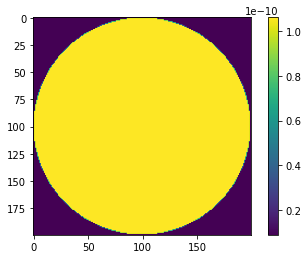

In [11]:
# cir.smoothen(Nx,Ny)
plt.imshow(cir.eps)
plt.colorbar()

In [12]:
## Get fields

In [13]:
Δx = Δy = np.unique(np.diff(cir.X))[0]

In [14]:
from fdfd.solve import maxwell

In [15]:
Ce = maxwell.Ce(Nx, Ny, 1, Δx, Δy, Δz=1)
Ch = maxwell.Ch(Nx, Ny, 1, Δx, Δy, Δz=1)

In [16]:
from scipy.sparse import csc_matrix

In [17]:
Ce = csc_matrix(Ce)
Ch = csc_matrix(Ch)

In [18]:
ϵ = np.hstack((np.ravel(cir.eps), np.ravel(cir.eps), np.ravel(cir.eps)))
Tϵ = spdiags(ϵ, 0, ϵ.shape[0], ϵ.shape[0], format = 'csr')

In [20]:
μ = np.hstack((np.ravel(cir.mu), np.ravel(cir.mu), np.ravel(cir.mu)))
Tμ = spdiags(μ, 0, μ.shape[0], μ.shape[0], format = 'csr')

In [21]:
from scipy.sparse import csr_matrix

In [22]:
jz = np.zeros((Nx,Ny))
jz[Nx//2,Ny//2] = 10
jx = jy = np.zeros((Nx,Ny))
j = np.vstack((jx,jy,jz))
J = csr_matrix(j.flatten()).T

In [23]:
mx = my = mz = np.zeros((Nx,Ny))
m = np.vstack((mx,my,mz))
M = csr_matrix(m.flatten()).T

In [24]:
solvedE = maxwell.solveE(Ce, Ch, ω, Tϵ, Tμ, J, M)

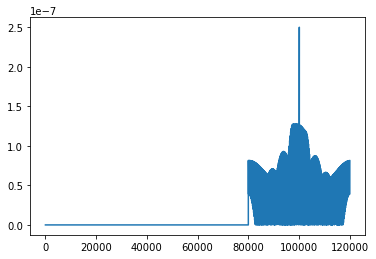

In [25]:
plt.plot(np.abs(solvedE))

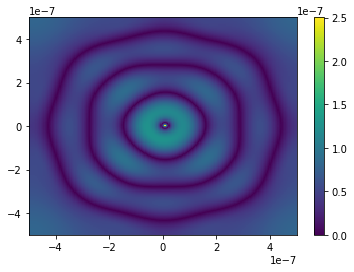

In [26]:
plt.pcolormesh(cir.X, cir.Y, np.reshape(np.abs(solvedE[-(Nx*Ny+1):-1]), (Nx, Ny)))
plt.colorbar()

# eigensolver

In [27]:
from fdfd.solve.eigensolver import eigenmode

In [28]:
eigs = eigenmode.solveE(10, Ce, Ch, ω, Tϵ, Tμ)

KeyboardInterrupt: 

In [ ]:
eigs

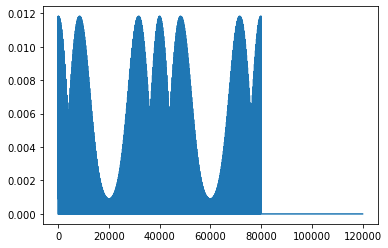

In [127]:
k = 3
plt.plot(np.abs(eigs[1].T[k]))

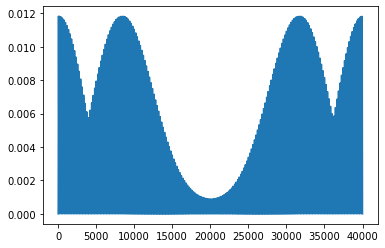

In [128]:
plt.plot(np.abs(eigs[1].T[k][0:(Nx*Ny+1)]))

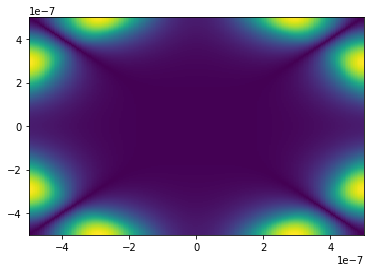

In [129]:
plt.pcolormesh(cir.X, cir.Y, np.reshape(np.abs(eigs[1].T[k][0:(Nx*Ny)]), (Nx, Ny)))

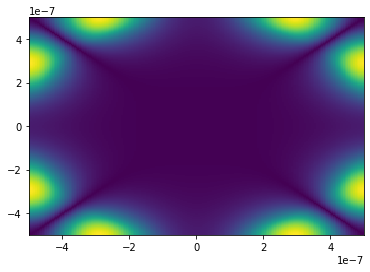

In [130]:
plt.pcolormesh(cir.X, cir.Y, np.reshape(np.abs(eigs[1].T[k][Nx*Ny:2*(Nx*Ny)]), (Nx, Ny)))

Another approach

In [175]:
invTμ = diags(1./Tμ.diagonal())
invTϵ = diags(1./Tϵ.diagonal())
O = invTϵ * Ch * invTμ * Ce

In [177]:
k_eigs = 5

In [178]:
eigg = eigs(O, k_eigs)

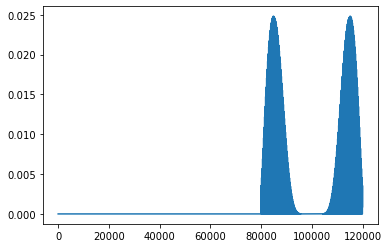

In [185]:
plt.plot(np.abs(eigg[1].T[3]))

# other tests

Now let us only change by making the circle smaller, on the order of the wavelength...

In [25]:
cir2 = Circle(x0=0, y0=0, eps_back=1.0, eps_circ=4.0, radius=1.0e-6)
cir2.make(Nx,Ny)
Δx = Δy = np.unique(np.diff(cir2.X))[0]
Ce = maxwell.Ce(Nx, Ny, 1, Δx, Δy, Δz=1)
Ch = maxwell.Ch(Nx, Ny, 1, Δx, Δy, Δz=1)
ϵ = np.hstack((np.ravel(cir2.eps), np.ravel(cir2.eps), np.ravel(cir2.eps)))
Tϵ = spdiags(ϵ, 0, ϵ.shape[0], ϵ.shape[0], format = 'csr')
μ = np.hstack((np.ravel(cir2.mu), np.ravel(cir2.mu), np.ravel(cir2.mu)))
Tμ = spdiags(μ, 0, μ.shape[0], μ.shape[0], format = 'csr')
solvedE = maxwell.solveE(Ce, Ch, ω, Tϵ, Tμ, j, m)

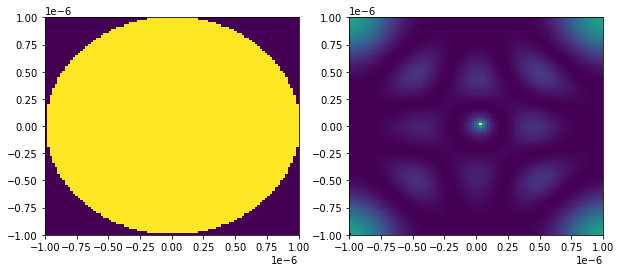

In [26]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].pcolormesh(cir2.X, cir2.Y, cir2.eps)
axs[1].pcolormesh(cir2.X, cir2.Y, np.reshape(np.abs(solvedE[-10001:-1])**2, (Nx, Ny)))

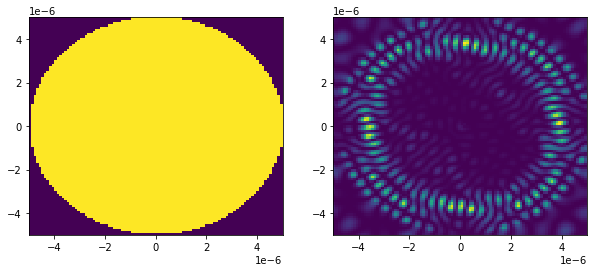

In [27]:
cir3 = Circle(x0=0, y0=0, eps_back=1.0, eps_circ=4.0, radius=5.0e-6)
cir3.make(Nx,Ny)
Δx = Δy = np.unique(np.diff(cir3.X))[0]
Ce = maxwell.Ce(Nx, Ny, 1, Δx, Δy, Δz=1)
Ch = maxwell.Ch(Nx, Ny, 1, Δx, Δy, Δz=1)
ϵ = np.hstack((np.ravel(cir3.eps), np.ravel(cir3.eps), np.ravel(cir3.eps)))
Tϵ = spdiags(ϵ, 0, ϵ.shape[0], ϵ.shape[0], format = 'csr')
μ = np.hstack((np.ravel(cir3.mu), np.ravel(cir3.mu), np.ravel(cir3.mu)))
Tμ = spdiags(μ, 0, μ.shape[0], μ.shape[0], format = 'csr')
solvedE = maxwell.solveE(Ce, Ch, ω, Tϵ, Tμ, j, m)

fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].pcolormesh(cir3.X, cir3.Y, cir2.eps)
axs[1].pcolormesh(cir3.X, cir3.Y, np.reshape(np.abs(solvedE[-10001:-1])**2, (Nx, Ny)))